In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from brokenaxes import brokenaxes

In [2]:
sns.set_context('talk')

## Constants

In [3]:
C = (100*299792458/1E9) # Convert [/cm] to [GHz]

## Plotting n=50 D-state spectra

In [4]:
offset_th =  45881.6488 # [/cm] theoretically predicted 5s50s, 3S1, F=11/2 state energy.
data_th = pd.read_excel('theory_line_positions.xlsx', sheet_name='5s50d')

offset_ex = 45881.6510 # [/cm] experimentally measured 5s50s, 3S1, F=11/2 state energy.

# [sheet_name, line center [/cm], line center synth. [GHz], order]
sheet_list = [['5s50s3S1F112', offset_ex, 1784.1273, 1],
              ['5s50s3S1F92',  45881.7138, 1263.9214, 1],
              ['5s50d-45883.15382', 45883.1538, 1582.3811, 1],
              ['5s50d-45883.28822', 45883.2882, 1389.0922, 1],
              ['5s50d-45883.41462',  45883.4146, 1822.8587, 1],
              ['5s50d-45883.43742', 45883.4374, 1430.8959, 1]]

for idx, sheet_details in enumerate(sheet_list):
    
    sheet_name = sheet_details[0]
    offset = sheet_details[1]
    synth_center = sheet_details[2]
    order = sheet_details[3]
    
    # If first element in list
    if idx == 0:
        data_ex = pd.read_excel('Rydberg_Spectra-20180516.xlsx', sheet_name=sheet_name)
        data_ex['energy'] = order*2*(data_ex['synth_freq'] - synth_center)/1000/C + offset
        print([min(data_ex['uv_wavenumber']), max(data_ex['uv_wavenumber'])])
    
    else:
        temp = pd.read_excel('Rydberg_Spectra-20180516.xlsx', sheet_name=sheet_name)
        temp['energy'] = order*2*(temp['synth_freq'] - synth_center)/1000/C + offset
        print([min(temp['uv_wavenumber']), max(temp['uv_wavenumber'])])
        
        data_ex = pd.concat([data_ex, temp],
                            join='outer', ignore_index=True)

data_ex['detuning'] = data_ex['energy'] - offset_ex

[45881.6504110921, 45881.6527460408]
[45881.7038850336, 45881.7248995716]
[45883.1222648366, 45883.1943146812]
[45883.2696071235, 45883.3174402147]
[45883.3720071868, 45883.426428169]
[45883.4160051851, 45883.4639049892]


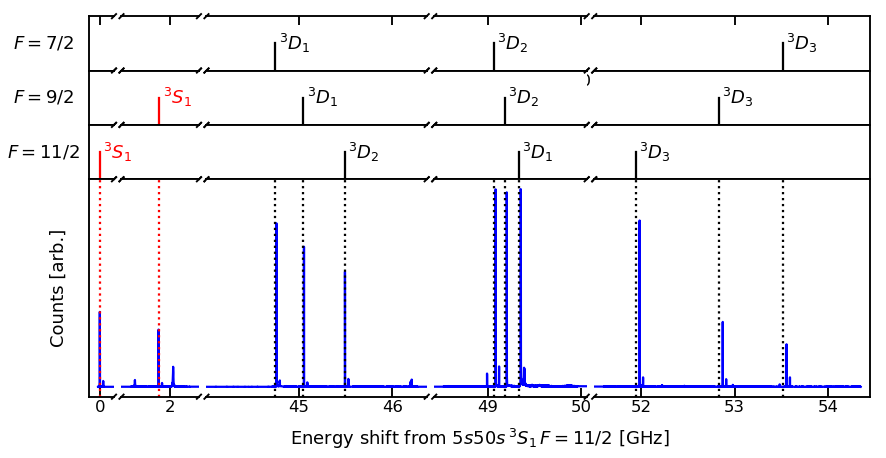

In [5]:
xdata = data_ex['detuning']*C
ydata = data_ex['avg_counts']

# brokenaxes limits in [/cm]
#xlimits = [[45881.65039109209, 45881.65272604075],
#           [45881.70386503359, 45881.724879571586],
#           [45883.12228612516, 45883.19433596972],
#           [45883.26958097257, 45883.31741406382],
#           [45883.37199661336, 45883.42641759549],
#           [45883.41599212989, 45883.46389193396]]

xlimits = [[45881.65039109209, 45881.65272604075],
           [45881.70386503359, 45881.724879571586],
           [45883.12228612516, 45883.19433596972],
           [45883.26958097257, 45883.31741406382],
           [45883.37199661336, 45883.46389193396]]

# brokenaxes limits in [GHz]
xlimits = (np.array(xlimits)-offset_ex)*C
xlimits[:,0] = xlimits[:,0] - 0.1
xlimits[:,1] = xlimits[:,1] + 0.1
xlimits = xlimits.tolist()

bax_kwargs = {'d':0.003,
              'wspace':0.05,
              'despine':False}

fig=plt.figure(figsize=(14,7))
gs=GridSpec(4,1, height_ratios=[1,1,1,4], wspace=0, hspace=0)

bax0 = brokenaxes(xlims=xlimits, subplot_spec=gs[0], fig=fig, **bax_kwargs)
bax1 = brokenaxes(xlims=xlimits, subplot_spec=gs[1], fig=fig, **bax_kwargs)
bax2 = brokenaxes(xlims=xlimits, subplot_spec=gs[2], fig=fig, **bax_kwargs)
bax3 = brokenaxes(xlims=xlimits, subplot_spec=gs[3], fig=fig, **bax_kwargs)

bax3.plot(xdata, ydata, color='blue')

#####################################################
### Put in theory lines
(ymin, ymax) = (0, 0.5)
color_S = 'red'
color_D = 'black'

for index, row in data_th.iterrows():
    xc = (row['E_theor']-offset_th)*C
    
    if row['F']==7/2:
        if row['Series'] == '5sns':
            bax0.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_S)
        
        elif row['Series'] == '5snd':
            bax0.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_D)
    
    elif row['F']==9/2:
        if row['Series'] == '5sns':
            bax1.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_S)
        
        elif row['Series'] == '5snd':
            bax1.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_D)
    
    elif row['F']==11/2:
        if row['Series'] == '5sns':
            bax2.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_S)
        
        elif row['Series'] == '5snd':
            bax2.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_D)
            
    else:
        print('Error!')
        print(row)

###########
# Put in text labels by hand
#text_offset = 0.01*(max(xdata)-min(xdata))
text_offset = 0.1

########
## F=7/2

# 5s50d, 3D1, F=7/2
xc = (45883.1414 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{1}$',
         va='center', ha='left', ma='center',
         transform=bax0.axs[2].transData,
         color=color_D)

# 5s50d, 3D2, F=7/2
xc = (45883.2855 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{2}$',
         va='center', ha='left', ma='center',
         transform=bax0.axs[3].transData,
         color=color_D)

# 5s50d, 3D3, F=7/2
xc = (45883.4339 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{3}$',
         va='center', ha='left', ma='center',
         transform=bax0.axs[4].transData,
         color=color_D)

########
## F=9/2

# 5s50s, 3S1, F=9/2
xc = (45881.7119 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}S_{1}$',
         va='center', ha='left', ma='center',
         transform=bax1.axs[1].transData,
         color=color_S)

# 5s50d, 3D1, F=9/2
xc = (45883.1514 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{1}$',
         va='center', ha='left', ma='center',
         transform=bax1.axs[2].transData,
         color=color_D)

# 5s50d, 3D2, F=9/2
xc = (45883.2893 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{2}$',
         va='center', ha='left', ma='center',
         transform=bax1.axs[3].transData,
         color=color_D)

# 5s50d, 3D3, F=9/2
xc = (45883.4111 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{3}$',
         va='center', ha='left', ma='center',
         transform=bax1.axs[4].transData,
         color=color_D)

########
## F=11/2

# 5s50s, 3S1, F=11/2
xc = (45881.6488 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}S_{1}$',
         va='center', ha='left', ma='center',
         transform=bax2.axs[0].transData,
         color=color_S)

# 5s50d, 3D2, F=11/2
xc = (45883.1662 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{2}$',
         va='center', ha='left', ma='center',
         transform=bax2.axs[2].transData,
         color=color_D)

# 5s50d, 3D1, F=11/2
xc = (45883.2942 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{1}$',
         va='center', ha='left', ma='center',
         transform=bax2.axs[3].transData,
         color=color_D)

# 5s50d, 3D3, F=11/2
xc = (45883.3814 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{3}$',
         va='center', ha='left', ma='center',
         transform=bax2.axs[4].transData,
         color=color_D)

#####################################################

#bax3.set_xlabel(r'Energy shift from $5s50s\,{}^{3}S_{1}\,F=11/2$ [GHz]', labelpad=40, ha='center', va='center')
bax3.set_xlabel(r'Energy shift from $5s50s\,{}^{3}S_{1}\,F=11/2$ [GHz]', labelpad=40, ha='center')
bax0.set_ylabel(r'$F=7/2$', rotation=0, labelpad=45, va='center')
bax1.set_ylabel(r'$F=9/2$', rotation=0, labelpad=45, va='center')
bax2.set_ylabel(r'$F=11/2$', rotation=0, labelpad=45, va='center')
bax3.set_ylabel(r'Counts [arb.]', ha='center', va='center')

#bax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=True, direction='in')

for bax in [bax1, bax2]:
    for ax in bax.axs:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    #bax.set_spines()

for ax in bax0.axs:
    ax.set_yticks([])
    ax.tick_params(axis='both', which='both', bottom=False, top=True, left=False, right=False, direction='in')
    #bax.set_spines()

# Hacky code to get ticks on both left and right sides
#bax3.axs[-1].set_yticks(bax3.axs[0].get_yticks())
#bax3.axs[-1].yaxis.set_ticks_position('right')
#bax3.axs[-1].tick_params(labelright=False)
#for a in bax3.axs:
#    a.set_ylim((-0.2, 3.9))

# Remove counts tick labels
for ax in bax3.axs:
    ax.set_yticks([])
    ax.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False, direction='in')

plt.savefig('spectra-n50.svg', bbox_inches='tight')
plt.show()

## Plotting n=60 D-state spectra

In [6]:
offset_th =  45897.9000 # [/cm] theoretically predicted 5s60s, 3S1, F=11/2 state energy.
data_th = pd.read_excel('theory_line_positions.xlsx', sheet_name='5s60d')

offset_ex = 45897.9014 # [/cm] experimentally measured 5s60s, 3S1, F=11/2 state energy.

# [sheet_name, line center [/cm], line center synth. [GHz], order]
sheet_list = [['5s60s3S1F112', offset_ex, 1757.4420, 1],
              ['5s60s1S0F92',  45898.1444, 1865.7289, 1],
              ['5s60s3S1F72', 45898.0688, 1407.6380, 1],
              ['5s60d-45898.74281', 45898.7428, 1297.5544, 1],
              ['5s60d-45898.85941', 45898.8594, 1583.7925, 1],
              ['5s60d-45898.94321', 45898.9432, 1373.2691, 1]]

for idx, sheet_details in enumerate(sheet_list):
    
    sheet_name = sheet_details[0]
    offset = sheet_details[1]
    synth_center = sheet_details[2]
    order = sheet_details[3]
    
    # If first element in list
    if idx == 0:
        data_ex = pd.read_excel('Rydberg_Spectra-20180516.xlsx', sheet_name=sheet_name)
        data_ex['energy'] = order*2*(data_ex['synth_freq'] - synth_center)/1000/C + offset
        print([min(data_ex['uv_wavenumber']), max(data_ex['uv_wavenumber'])])
        
        # Scale 5s60s, 3S1, F=11/2 counts
        data_ex['avg_counts'] = data_ex['avg_counts']/10
    
    else:
        temp = pd.read_excel('Rydberg_Spectra-20180516.xlsx', sheet_name=sheet_name)
        temp['energy'] = order*2*(temp['synth_freq'] - synth_center)/1000/C + offset
        print([min(temp['uv_wavenumber']), max(temp['uv_wavenumber'])])
        
        data_ex = pd.concat([data_ex, temp],
                            join='outer', ignore_index=True)

data_ex['detuning'] = data_ex['energy'] - offset_ex

[45897.901166519, 45897.9032079312]
[45898.142893691, 45898.1460291935]
[45898.0492872941, 45898.0965199699]
[45898.7306312814, 45898.7781975213]
[45898.8519520072, 45898.8757017708]
[45898.9125875419, 45898.9732128162]


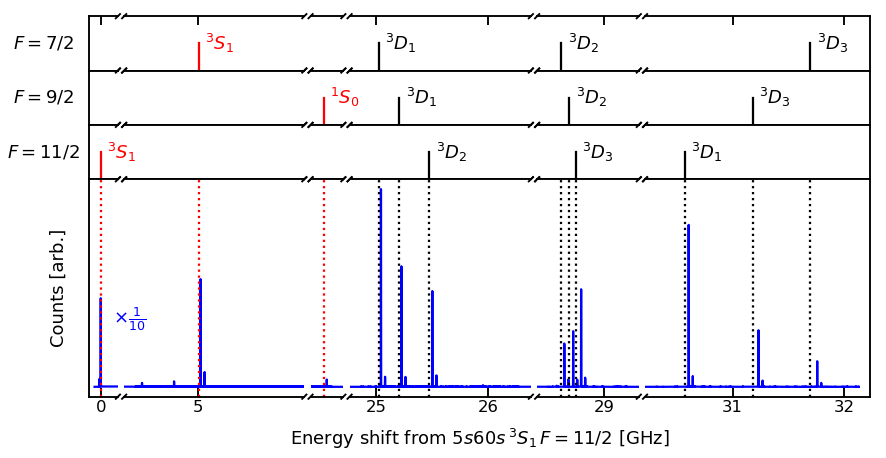

In [7]:
xdata = data_ex['detuning']*C
ydata = data_ex['avg_counts']

xlimits = [[45897.901166519, 45897.9032079312],
           [45898.0492872941, 45898.0965199699],
           [45898.142893691, 45898.1460291935],
           [45898.7306312814, 45898.7781975213],
           [45898.8519520072, 45898.8757017708],
           [45898.9125875419, 45898.9732128162]]

# brokenaxes limits in [GHz]
xlimits = (np.array(xlimits)-offset_ex)*C
xlimits[:,0] = xlimits[:,0] - 0.1
xlimits[:,1] = xlimits[:,1] + 0.1
xlimits = xlimits.tolist()

bax_kwargs = {'d':0.003,
              'wspace':0.05,
              'despine':False}

fig=plt.figure(figsize=(14,7))
gs=GridSpec(4,1, height_ratios=[1,1,1,4], wspace=0, hspace=0)

bax0 = brokenaxes(xlims=xlimits, subplot_spec=gs[0], fig=fig, **bax_kwargs)
bax1 = brokenaxes(xlims=xlimits, subplot_spec=gs[1], fig=fig, **bax_kwargs)
bax2 = brokenaxes(xlims=xlimits, subplot_spec=gs[2], fig=fig, **bax_kwargs)
bax3 = brokenaxes(xlims=xlimits, subplot_spec=gs[3], fig=fig, **bax_kwargs)

bax3.plot(xdata, ydata, color='blue')

#####################################################
### Put in theory lines
(ymin, ymax) = (0, 0.5)
color_S = 'red'
color_D = 'black'

for index, row in data_th.iterrows():
    xc = (row['E_theor']-offset_th)*C
    
    if row['F']==7/2:
        if row['Series'] == '5sns':
            bax0.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_S)
        
        elif row['Series'] == '5snd':
            bax0.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_D)
    
    elif row['F']==9/2:
        if row['Series'] == '5sns':
            bax1.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_S)
        
        elif row['Series'] == '5snd':
            bax1.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_D)
    
    elif row['F']==11/2:
        if row['Series'] == '5sns':
            bax2.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_S)
        
        elif row['Series'] == '5snd':
            bax2.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
            bax3.axvline(x=xc, linestyle=':', color=color_D)
            
    else:
        print('Error!')
        print(row)

###########
# Put in text labels by hand
#text_offset = 0.01*(max(xdata)-min(xdata))
text_offset = 0.1

########
## F=7/2

# 5s60s, 3S1, F=7/2
xc = (45898.0668 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}S_{1}$',
         va='center', ha='left', ma='center',
         transform=bax0.axs[1].transData,
         color=color_S)

# 5s60d, 3D1, F=7/2
xc = (45898.7347 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{1}$',
         va='center', ha='left', ma='center',
         transform=bax0.axs[3].transData,
         color=color_D)

# 5s60d, 3D2, F=7/2
xc = (45898.8544 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{2}$',
         va='center', ha='left', ma='center',
         transform=bax0.axs[4].transData,
         color=color_D)

# 5s60d, 3D3, F=7/2
xc = (45898.9573 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{3}$',
         va='center', ha='left', ma='center',
         transform=bax0.axs[5].transData,
         color=color_D)

########
## F=9/2

# 5s60s, 1S0, F=9/2
xc = (45898.1421 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{1}S_{0}$',
         va='center', ha='left', ma='center',
         transform=bax1.axs[2].transData,
         color=color_S)

# 5s60d, 3D1, F=9/2
xc = (45898.7407 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{1}$',
         va='center', ha='left', ma='center',
         transform=bax1.axs[3].transData,
         color=color_D)

# 5s60d, 3D2, F=9/2
xc = (45898.8569 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{2}$',
         va='center', ha='left', ma='center',
         transform=bax1.axs[4].transData,
         color=color_D)

# 5s60d, 3D3, F=9/2
xc = (45898.9400 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{3}$',
         va='center', ha='left', ma='center',
         transform=bax1.axs[5].transData,
         color=color_D)

########
## F=11/2

# 5s60s, 3S1, F=11/2
xc = (45897.9000 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}S_{1}$',
         va='center', ha='left', ma='center',
         transform=bax2.axs[0].transData,
         color=color_S)

plt.text(xc+0.05, 1000, r'$\times \frac{1}{10}$',
         va='center', ha='left', ma='center',
         transform=bax3.axs[0].transData,
         color='blue')

# 5s60d, 3D2, F=11/2
xc = (45898.7497 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{2}$',
         va='center', ha='left', ma='center',
         transform=bax2.axs[3].transData,
         color=color_D)

# 5s60d, 3D3, F=11/2
xc = (45898.8588 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{3}$',
         va='center', ha='left', ma='center',
         transform=bax2.axs[4].transData,
         color=color_D)

# 5s60d, 3D1, F=11/2
xc = (45898.9197 - offset_ex)*C + text_offset
plt.text(xc, 0, r'${}^{3}D_{1}$',
         va='center', ha='left', ma='center',
         transform=bax2.axs[5].transData,
         color=color_D)

#####################################################

#bax3.set_xlabel(r'Energy shift from $5s60s\,{}^{3}S_{1}\,F=11/2$ [GHz]', labelpad=40, ha='center', va='center')
bax3.set_xlabel(r'Energy shift from $5s60s\,{}^{3}S_{1}\,F=11/2$ [GHz]', labelpad=40, ha='center')
bax0.set_ylabel(r'$F=7/2$', rotation=0, labelpad=45, va='center')
bax1.set_ylabel(r'$F=9/2$', rotation=0, labelpad=45, va='center')
bax2.set_ylabel(r'$F=11/2$', rotation=0, labelpad=45, va='center')
bax3.set_ylabel(r'Counts [arb.]', ha='center', va='center')

#bax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=True, direction='in')

for bax in [bax1, bax2]:
    for ax in bax.axs:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    #bax.set_spines()

for ax in bax0.axs:
    ax.set_yticks([])
    ax.tick_params(axis='both', which='both', bottom=False, top=True, left=False, right=False, direction='in')
    #bax.set_spines()

# Hacky code to get ticks on both left and right sides
#bax3.axs[-1].set_yticks(bax3.axs[0].get_yticks())
#bax3.axs[-1].yaxis.set_ticks_position('right')
#bax3.axs[-1].tick_params(labelright=False)
#for a in bax3.axs:
#    a.set_ylim((-0.2, 14))

# Remove counts tick labels
for ax in bax3.axs:
    ax.set_yticks([])
    ax.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False, direction='in')

plt.savefig('spectra-n60.svg', bbox_inches='tight')
plt.show()

## Plotting n=98-99 spectra

In [8]:
offset_th = 45919.8646 # [/cm] theoretically predicted 5s60s, 3S1, F=11/2 state energy.
data_th = pd.read_excel('theory_line_positions.xlsx', sheet_name='5s98d-5s99d')

offset_ex = 45919.8662 # [/cm] experimentally measured 5s98s, 3S1, F=11/2 state energy.

# [sheet_name, line center [/cm], line center synth. [GHz], order]
sheet_list = [['5s98s-5s99s', offset_ex, 26.0508, 1]]

for idx, sheet_details in enumerate(sheet_list):
    
    sheet_name = sheet_details[0]
    offset = sheet_details[1]
    synth_center = sheet_details[2]
    order = sheet_details[3]
    
    # If first element in list
    if idx == 0:
        data_ex = pd.read_excel('Rydberg_Spectra-20180516.xlsx', sheet_name=sheet_name)
        data_ex['energy'] = order*2*(data_ex['synth_freq'] - synth_center)/1000/C + offset
        print([min(data_ex['uv_wavenumber']), max(data_ex['uv_wavenumber'])])
        
        # Scale 5s60s, 3S1, F=11/2 counts
        data_ex['avg_counts'] = data_ex['avg_counts']/10
    
    else:
        temp = pd.read_excel('Rydberg_Spectra-20180516.xlsx', sheet_name=sheet_name)
        temp['energy'] = order*2*(temp['synth_freq'] - synth_center)/1000/C + offset
        print([min(temp['uv_wavenumber']), max(temp['uv_wavenumber'])])
        
        data_ex = pd.concat([data_ex, temp],
                            join='outer', ignore_index=True)

data_ex['detuning'] = data_ex['energy'] - offset_ex

[nan, nan]


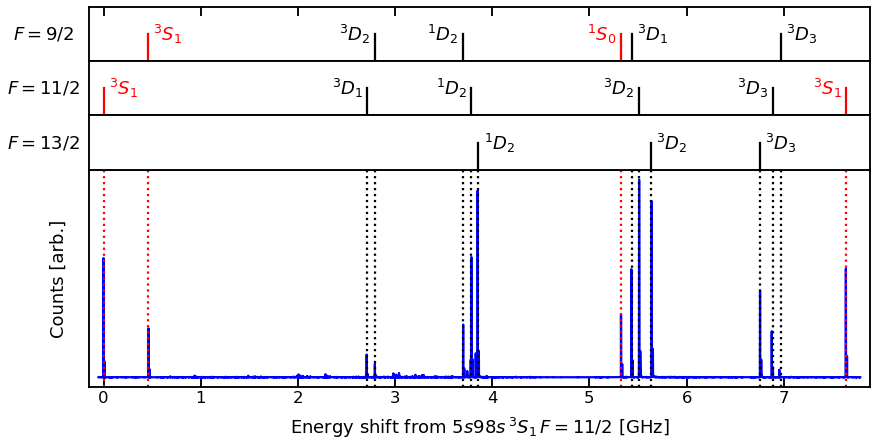

In [9]:
xdata = data_ex['detuning']*C
ydata = data_ex['avg_counts']

fig=plt.figure(figsize=(14,7))
gs=GridSpec(4,1, height_ratios=[1,1,1,4], wspace=0, hspace=0)

ax3 = plt.subplot(gs[3])
ax0 = plt.subplot(gs[0], sharex=ax3)
ax1 = plt.subplot(gs[1], sharex=ax3)
ax2 = plt.subplot(gs[2], sharex=ax3)

ax3.plot(xdata, ydata, color='blue')
ax3.set_xlim((min(xdata)-0.1, max(xdata)+0.1))

#####################################################
### Put in theory lines
(ymin, ymax) = (0, 0.5)
color_S = 'red'
color_D = 'black'

for index, row in data_th.iterrows():
    xc = (row['E_theor']-offset_th)*C
    
    if row['F']==9/2:
        if row['Series'] == '5sns':
            ax0.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
            ax3.axvline(x=xc, linestyle=':', color=color_S)
        
        elif row['Series'] == '5snd':
            ax0.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
            ax3.axvline(x=xc, linestyle=':', color=color_D)
    
    elif row['F']==11/2:
        if row['Series'] == '5sns':
            ax1.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
            ax3.axvline(x=xc, linestyle=':', color=color_S)
        
        elif row['Series'] == '5snd':
            ax1.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
            ax3.axvline(x=xc, linestyle=':', color=color_D)
    
    elif row['F']==13/2:
        if row['Series'] == '5sns':
            ax2.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
            ax3.axvline(x=xc, linestyle=':', color=color_S)
        
        elif row['Series'] == '5snd':
            ax2.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
            ax3.axvline(x=xc, linestyle=':', color=color_D)
        
    else:
        print('Error!')
        print(row)

###########
# Put in text labels by hand
text_offset = 0.1

########
## F=9/2

# 5s98s, 3S1, F=9/2
xc = (45919.8800 - offset_ex)*C + text_offset
plt.text(xc, 0.5, r'${}^{3}S_{1}$',
         va='center', ha='left', ma='center',
         transform=ax0.transData,
         color=color_S)

# 5s97d, 3D2, F=9/2
xc = (45919.9579 - offset_ex)*C - text_offset*0
plt.text(xc, 0.5, r'${}^{3}D_{2}$',
         va='center', ha='right', ma='center',
         transform=ax0.transData,
         color=color_D)

# 5s97d, 1D2, F=9/2
xc = (45919.9879 - offset_ex)*C - text_offset*0
plt.text(xc, 0.5, r'${}^{1}D_{2}$',
         va='center', ha='right', ma='center',
         transform=ax0.transData,
         color=color_D)

# 5s98s, 1S0, F=9/2
xc = (45920.0423 - offset_ex)*C - text_offset*0
plt.text(xc, 0.5, r'${}^{1}S_{0}$',
         va='center', ha='right', ma='center',
         transform=ax0.transData,
         color=color_S)

# 5s98d, 3D1, F=9/2
xc = (45920.0460 - offset_ex)*C + text_offset
plt.text(xc, 0.5, r'${}^{3}D_{1}$',
         va='center', ha='left', ma='center',
         transform=ax0.transData,
         color=color_D)

# 5s98d, 3D3, F=9/2
xc = (45920.0971 - offset_ex)*C + text_offset
plt.text(xc, 0.5, r'${}^{3}D_{3}$',
         va='center', ha='left', ma='center',
         transform=ax0.transData,
         color=color_D)

########
## F=11/2

# 5s98s, 3S1, F=11/2
xc = (45919.8646 - offset_ex)*C + text_offset
plt.text(xc, 0.5, r'${}^{3}S_{1}$',
         va='center', ha='left', ma='center',
         transform=ax1.transData,
         color=color_S)

# 5s97d, 3D1, F=11/2
xc = (45919.9552 - offset_ex)*C - text_offset*0
plt.text(xc, 0.5, r'${}^{3}D_{1}$',
         va='center', ha='right', ma='center',
         transform=ax1.transData,
         color=color_D)

# 5s97d, 1D2, F=11/2
xc = (45919.9909 - offset_ex)*C - text_offset*0
plt.text(xc, 0.5, r'${}^{1}D_{2}$',
         va='center', ha='right', ma='center',
         transform=ax1.transData,
         color=color_D)

# 5s98d, 3D2, F=11/2
xc = (45920.0485 - offset_ex)*C - text_offset*0
plt.text(xc, 0.5, r'${}^{3}D_{2}$',
         va='center', ha='right', ma='center',
         transform=ax1.transData,
         color=color_D)

# 5s98s, 3D3, F=11/2
xc = (45920.0943 - offset_ex)*C - text_offset*0
plt.text(xc, 0.5, r'${}^{3}D_{3}$',
         va='center', ha='right', ma='center',
         transform=ax1.transData,
         color=color_D)

# 5s99s, 3S1, F=11/2
xc = (45920.1196 - offset_ex)*C - text_offset*0
plt.text(xc, 0.5, r'${}^{3}S_{1}$',
         va='center', ha='right', ma='center',
         transform=ax1.transData,
         color=color_S)

########
## F=13/2

# 5s97d, 1D2, F=13/2
xc = (45919.9933 - offset_ex)*C + text_offset
plt.text(xc, 0.5, r'${}^{1}D_{2}$',
         va='center', ha='left', ma='center',
         transform=ax2.transData,
         color=color_D)

# 5s98d, 3D2, F=13/2
xc = (45920.0526 - offset_ex)*C + text_offset
plt.text(xc, 0.5, r'${}^{3}D_{2}$',
         va='center', ha='left', ma='center',
         transform=ax2.transData,
         color=color_D)

# 5s98d, 3D3, F=13/2
xc = (45920.0901 - offset_ex)*C + text_offset
plt.text(xc, 0.5, r'${}^{3}D_{3}$',
         va='center', ha='left', ma='center',
         transform=ax2.transData,
         color=color_D)

#####################################################

#ax3.set_xlabel(r'Energy shift from $5s98s\,{}^{3}S_{1}\,F=11/2$ [GHz]', labelpad=10, ha='center', va='center')
ax3.set_xlabel(r'Energy shift from $5s98s\,{}^{3}S_{1}\,F=11/2$ [GHz]', labelpad=10, ha='center')
ax0.set_ylabel(r'$F=9/2$', rotation=0, labelpad=45, va='center')
ax1.set_ylabel(r'$F=11/2$', rotation=0, labelpad=45, va='center')
ax2.set_ylabel(r'$F=13/2$', rotation=0, labelpad=45, va='center')
ax3.set_ylabel(r'Counts [arb.]', labelpad=30, ha='center', va='center')

ax0.set_yticks([])
ax0.tick_params(axis='both', which='both', bottom=False, top=True, left=False, right=False, direction='in')
plt.setp(ax0.get_xticklabels(), visible=False)

ax1.set_yticks([])
ax1.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2.set_yticks([])
ax2.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.setp(ax2.get_xticklabels(), visible=False)

ax3.set_yticks([])
ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False, direction='in')

plt.savefig('spectra-n98.svg', bbox_inches='tight')
plt.show()